In [54]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from utils import read_data, int_enc, shuffle_Xy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [55]:
GPL = "GPL96"

In [56]:
data = read_data(f"data/{GPL}.csv")
data = int_enc(data)

X = data.drop(["label"], axis=1).values
y = data["label"].values

X = StandardScaler().fit_transform(X)
X = PCA(n_components=50).fit_transform(X)

X, y = shuffle_Xy(X, y)

#### 10-fold cross validation

In [57]:
lr = LogisticRegression(max_iter=50000)
cv = cross_validate(lr, X, y, cv=10)
scores = cv["test_score"]

print("Avg. Score: {:.2f}".format(np.mean(scores)))
# save the results of 10-fold cv for analysis
np.save(f"results/LR{GPL}.npy", scores)

Avg. Score: 0.98


0.98 on GPL96

0.95 on GPL570

#### Confusion matrix

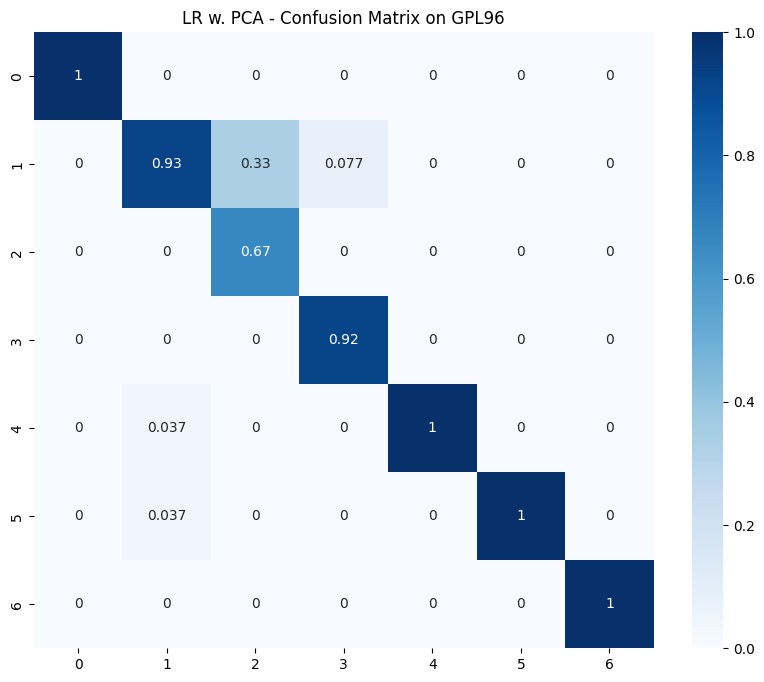

In [58]:
lr = LogisticRegression(max_iter=50000)

X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=.30)

lr.fit(X_tr, y_tr)
yhat = lr.predict(X_te)
cmat = confusion_matrix(y_te, yhat)
cmat = cmat / np.sum(cmat, axis=0) # pct

plt.figure(figsize=(10, 8))
sns.heatmap(cmat, cmap="Blues", annot=True)
plt.title(f"LR w. PCA - Confusion Matrix on {GPL}")
plt.savefig(f"results/LR{GPL}confusion.png")
plt.show()

#### ROC Curves

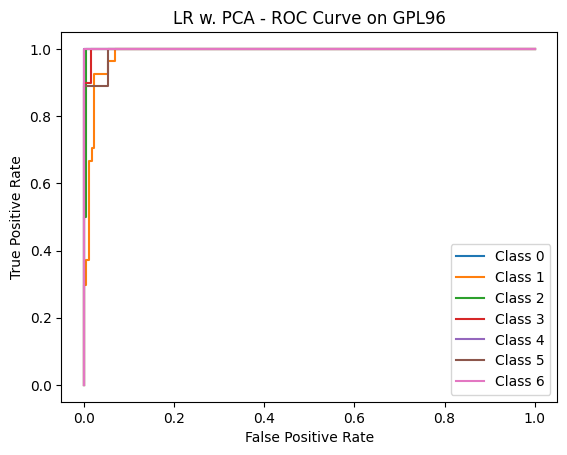

In [61]:
lr = LogisticRegression(max_iter=50000)

X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=.30)

lr.fit(X_tr, y_tr)
yhat = lr.predict_proba(X_te)

for i in range(len(np.unique(y))):
    
    fpr, tpr, _ = roc_curve(
        (y_te == i).astype(int),
        yhat[:, i]
    )

    plt.plot(fpr, tpr, label=f"Class {i}")

plt.figure(figsize=(10, 8))
plt.title(f"LR w. PCA - ROC Curve on {GPL}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.savefig(f"results/LR{GPL}ROC.png")
plt.show()